# 4.9 Data Visualization with Python
# Part II

## Contents

1- Importing Libraries and Latest DataFrame

2- Creating a Bar Chart, Histogram, Scatterplot, and Line Chart

3- Getting Descriptive Findings about Sales using a Histogram

4- Finding the Distribution of Orders among Customers in terms of Loyalty

5- Checking whether there’s a difference in expenditure depending on the hour of the day.

6- Conducting an Exploratory Analysis of Customer Demographics

7- Exploring the Connection of Age and Spending Power by Using a ScatterPlot

## 1) Importing Libraries and Latest DataFrame

In [42]:
#imports libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/calebhill/09:01:2023 - Instacart Basket Analysis/02 Data/Prepared Data'

In [3]:
path_2 = r'/Users/calebhill/09:01:2023 - Instacart Basket Analysis/04 Analysis/Visualizations'

In [4]:
file = 'ords_prods_cust_merged.pkl'

In [5]:
filepath = os.path.join(path, file)

In [6]:
all_merged = pd.read_pickle(filepath)

## 2) Creating a Bar Chart, Histogram, Scatterplot, and Line Chart

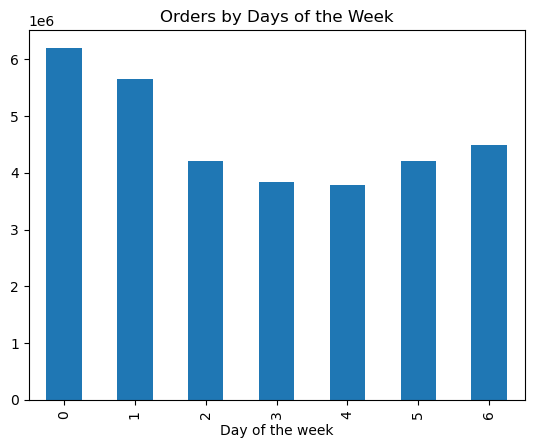

In [7]:
bar = all_merged['orders_day_of_week'].value_counts().sort_index().plot.bar(title = 'Orders by Days of the Week', xlabel= 'Day of the week')

In [8]:
#exports the visualization
bar.figure.savefig(os.path.join(path_2, 'day_of_week_bar.png'))

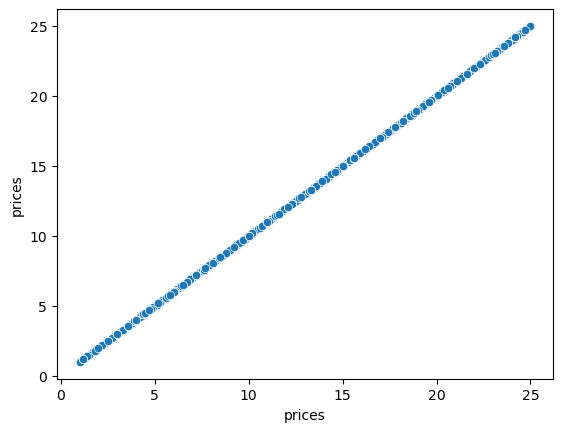

In [40]:
sp = sns.scatterplot(x = 'prices', y = 'prices',data = all_merged)

In [10]:
#exports the visualization
sp.figure.savefig(os.path.join(path_2, 'prices_sp.png'))

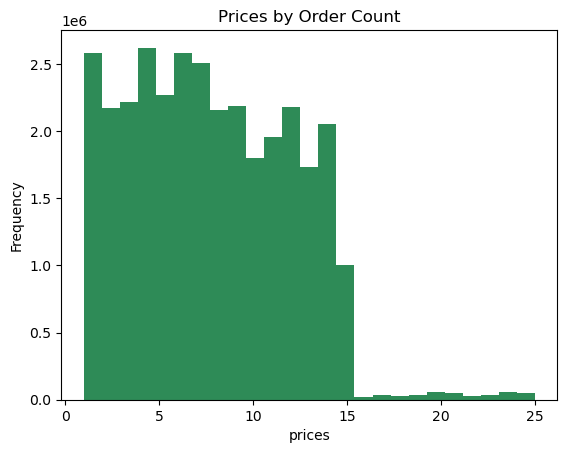

In [11]:
hist = all_merged['prices'].plot.hist(title='Prices by Order Count', xlabel='prices',bins = 25, color='seagreen')

In [12]:
pd.options.display.max_rows = None

In [13]:
#exports the visualization
hist.figure.savefig(os.path.join(path_2, 'prices_hist.png'))

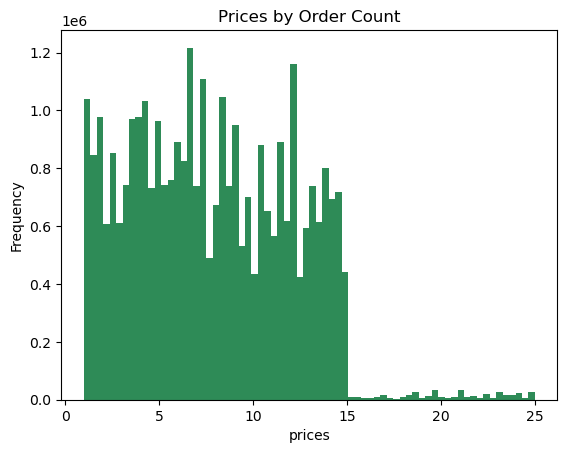

In [14]:
hist_2 = all_merged['prices'].plot.hist(title='Prices by Order Count', xlabel='prices',bins = 70, color='seagreen')

In [15]:
#exports the visualization
hist_2.figure.savefig(os.path.join(path_2, 'prices_hist_2.png'),dpi=300, bbox_inches='tight')

In [16]:
np.random.seed(4)

In [17]:
dev = np.random.rand(len(all_merged)) <= 0.7

In [18]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [19]:
big = all_merged[dev]

In [20]:
small = all_merged[~dev]

In [21]:
len(all_merged)

32404859

In [22]:
len(big) + len(small)

32404859

In [23]:
df_2 = small[['orders_day_of_week','prices']]

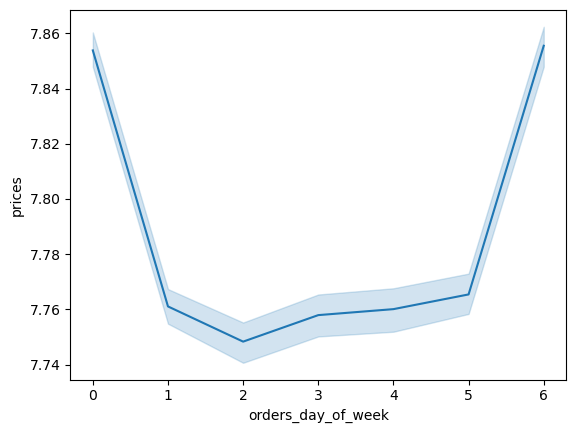

In [24]:
line_1 = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [25]:
#exports the visualization
line_1.figure.savefig(os.path.join(path_2, 'day_of_week_prices_line.png'),dpi=300, bbox_inches='tight')

In [26]:
df_4 = big[['orders_day_of_week','prices']]

## 3) Getting Descriptive Findings about Sales using a Histogram

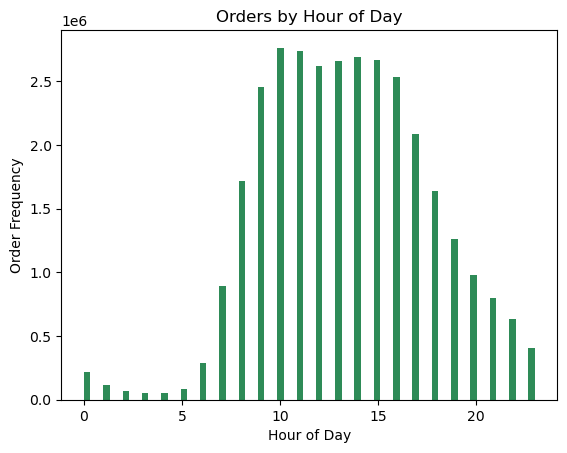

In [27]:
hist_3 = all_merged['order_hour_of_day'].plot.hist(bins = 70,color='seagreen',title ="Orders by Hour of Day", xlabel = 'Hour of Day', ylabel= 'Order Frequency')

In [28]:
#exports the visualization
hist_3.figure.savefig(os.path.join(path_2, 'order_by_hour_hist.png'),dpi=300, bbox_inches='tight')

## This histogram shows that most orders are placed between the hours of 9 and 16

In [29]:
all_merged.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,...,exists,price_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_frequency,order_frequency_flag
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid Range Product,Second Busiest Day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid Range Product,Regularly Busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Mid Range Product,Second Busiest Day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Low Range Product,Regularly Busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,both,Low Range Product,Second Slowest Day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer


## 4) Finding the Distribution of Orders among Customers in terms of Loyalty

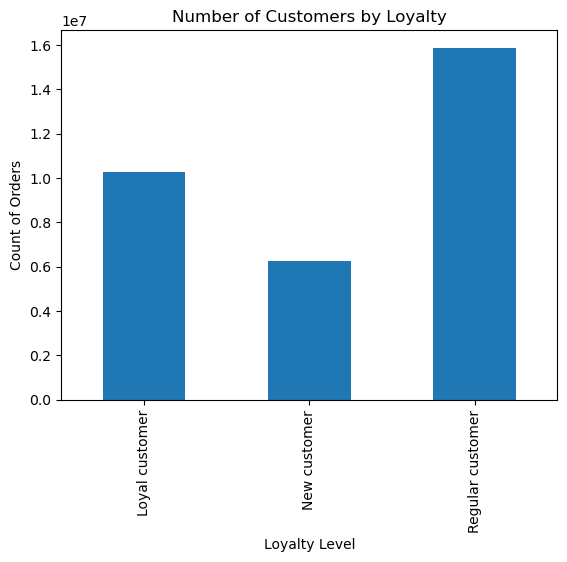

In [52]:
bar_2 = all_merged['loyalty_flag'].value_counts().sort_index().plot.bar(title="Number of Customers by Loyalty", ylabel="Count of Orders", xlabel='Loyalty Level')

In [53]:
#exports the visualization
bar_2.figure.savefig(os.path.join(path_2, 'loyalty_by_order_bar.png'), dpi=300, bbox_inches='tight')

## 5) Checking whether there’s a difference in expenditure depending on the hour of the day. 

In [32]:
df_3 = small[['order_hour_of_day', 'prices']]

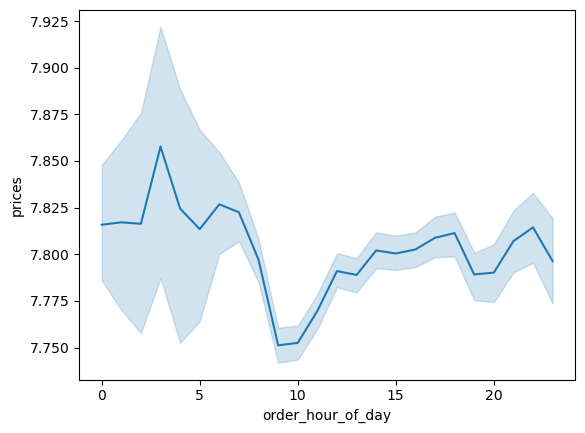

In [33]:
line_3 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [34]:
#exports the visualization
line_3.figure.savefig(os.path.join(path_2, 'prices_by_hour_line.png'))

## 6) Conducting an Exploratory Analysis of Customer Demographics

In [35]:
df_5 = small[['age', 'number_of_dependants']]

Text(0, 0.5, 'Number of Dependants')

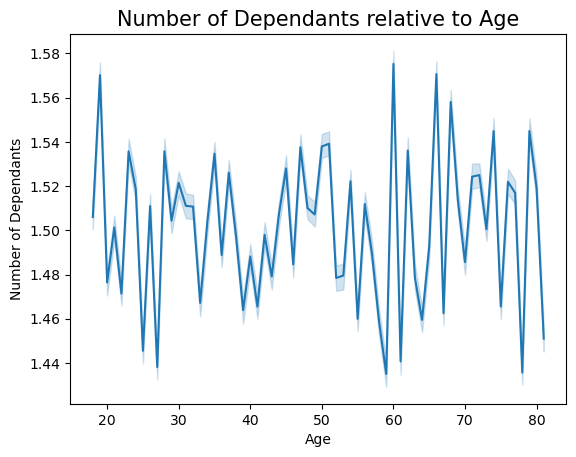

In [36]:
line_4 = sns.lineplot(data = df_5, y = 'number_of_dependants', x = 'age')
plt.title("Number of Dependants relative to Age", fontsize=15)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Number of Dependants',fontsize=10)

In [37]:
#exports the visualization
line_4.figure.savefig(os.path.join(path_2, 'dependants_relative_age_lp.png'))

## This chart shows that there is no clear relationship between age and the number of dependants

## 7) Exploring the Connection of Age and Spending Power by Using a ScatterPlot

Text(0.5, 0, 'Age')

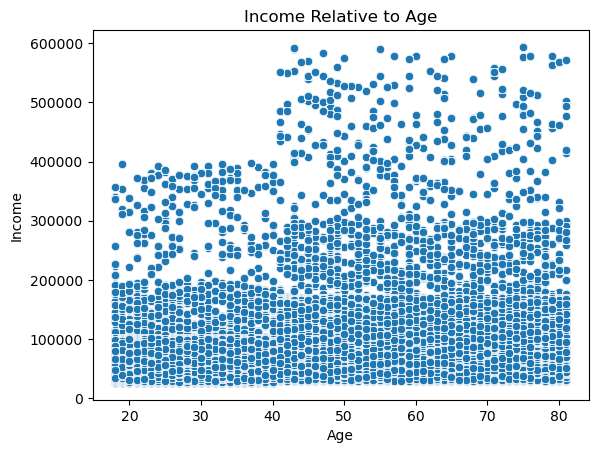

In [38]:
sns_2 = sns.scatterplot(x = 'age', y = 'income',data = all_merged)
plt.title('Income Relative to Age')
plt.ylabel('Income')
plt.xlabel('Age')

In [39]:
#exports the visualization
sns_2.figure.savefig(os.path.join(path_2, 'income_relative_age_sp.png'))

## This chart shows that while most people make less than 200,000 no matter their age, if the customer is older they more likely have a higher income.